In [2]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.corpus import stopwords
from joblib import dump, load
from tqdm import tqdm
nltk.download('stopwords')

# Configuración de visualización
%matplotlib inline
sns.set(style="whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miver\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Cargar los datos
train_data = pd.read_csv('train.csv', header=None, names=['Class', 'Title', 'Review'])
test_data = pd.read_csv('test.csv', header=None, names=['Class', 'Title', 'Review'])

# Mostrar las primeras filas del conjunto de entrenamiento
train_data.head()


,Class,Title,Review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


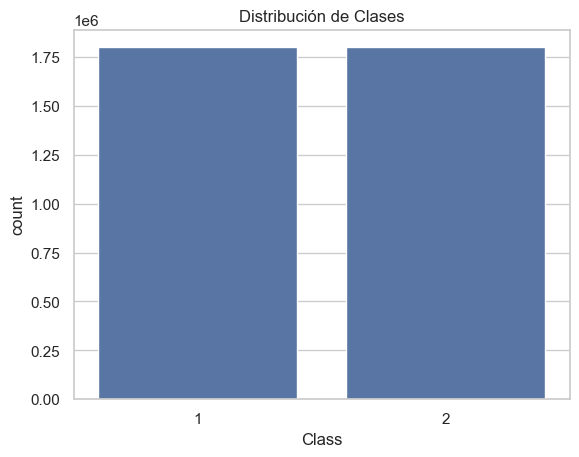

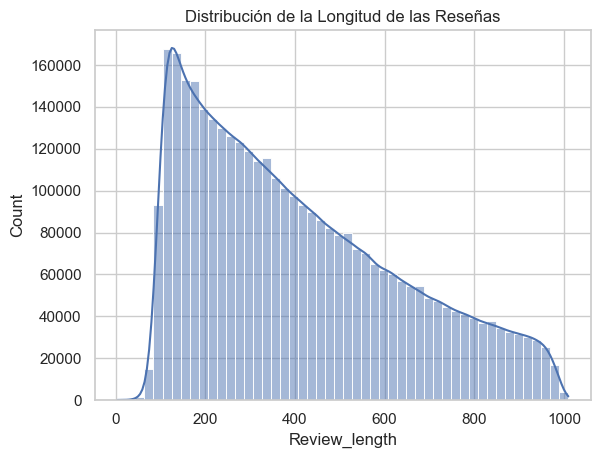

In [6]:
# Visualización del balance de clases
sns.countplot(x='Class', data=train_data)
plt.title('Distribución de Clases')
plt.show()

# Análisis de la longitud de las reseñas
train_data['Review_length'] = train_data['Review'].apply(len)
sns.histplot(train_data['Review_length'], bins=50, kde=True)
plt.title('Distribución de la Longitud de las Reseñas')
plt.show()


In [8]:
import re
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación y números
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenización
    words = text.split()
    # Eliminación de stopwords y stemming
    words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Aplicar la función de preprocesamiento con barra de progreso
tqdm.pandas()
train_data['Review'] = train_data['Review'].progress_apply(preprocess_text)


100%|█████████████████████████████████████████████████████████████████████| 3600000/3600000 [24:27:00<00:00, 40.90it/s]


In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['Review'])
y_train = train_data['Class']

# Verificar las dimensiones del dataset transformado
print(X_train.shape)


(3600000, 5000)


In [12]:
model = LogisticRegression()

# Entrenamiento con estimación de tiempo
import time
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")


Tiempo de entrenamiento: 10.12 segundos


In [14]:
# Guardar el modelo
model_filename = 'sentiment_analysis_model.joblib'
dump(model, model_filename)

# Cargar el modelo
model = load(model_filename)


In [16]:
X_test = vectorizer.transform(test_data['Review'])
y_test = test_data['Class']
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.79      0.75      0.77    200000
           2       0.77      0.80      0.78    200000

    accuracy                           0.78    400000
   macro avg       0.78      0.78      0.78    400000
weighted avg       0.78      0.78      0.78    400000



In [18]:
def check_sentiment(review):
    processed_review = preprocess_text(review)
    vectorized_review = vectorizer.transform([processed_review])
    prediction = model.predict(vectorized_review)
    sentiment = "Positivo" if prediction == 2 else "Negativo"
    return sentiment

# Lista de nuevas reseñas para probar
new_reviews = [
    "This is the best product I have ever purchased, absolutely fantastic!",
    "I'm really disappointed with this purchase, it broke after one week.",
    "The service was okay, not great but not terrible either.",
    "An utterly mesmerizing performance, the best I've seen this year!",
    "Horrible experience, I would not recommend this to anyone.",
    "I love this book! It was a thrilling read from start to finish.",
    "The movie was boring and too long, I fell asleep halfway through.",
    "This restaurant is my favorite, the food is always delicious and fresh.",
    "Terrible customer service, they refused to refund my money.",
    "These headphones are the best value for money, amazing quality sound!",
    "The app keeps crashing, it's so frustrating to use.",
    "It's an okay product, does the job but nothing spectacular."
]

# Evaluación de cada reseña con el modelo
sentiment_results = [(review, check_sentiment(review)) for review in new_reviews]

# Imprimir los resultados
for review, sentiment in sentiment_results:
    print(f"Reseña: {review}\nSentimiento Detectado: {sentiment}\n")



Reseña: This is the best product I have ever purchased, absolutely fantastic!
Sentimiento Detectado: Positivo

Reseña: I'm really disappointed with this purchase, it broke after one week.
Sentimiento Detectado: Negativo

Reseña: The service was okay, not great but not terrible either.
Sentimiento Detectado: Negativo

Reseña: An utterly mesmerizing performance, the best I've seen this year!
Sentimiento Detectado: Positivo

Reseña: Horrible experience, I would not recommend this to anyone.
Sentimiento Detectado: Negativo

Reseña: I love this book! It was a thrilling read from start to finish.
Sentimiento Detectado: Positivo

Reseña: The movie was boring and too long, I fell asleep halfway through.
Sentimiento Detectado: Negativo

Reseña: This restaurant is my favorite, the food is always delicious and fresh.
Sentimiento Detectado: Positivo

Reseña: Terrible customer service, they refused to refund my money.
Sentimiento Detectado: Negativo

Reseña: These headphones are the best value for 